Уравнение: $ 4x\cdot u''(x) + 2u'(x) + u = 0, u(0) = 1,  u'(0) = -0.5 $

Пусть $t = \sqrt(x)$, тогда $x = t^2$.

$\frac{d y(x)}{d x} = \frac{d y(t)}{d t} \frac{d t}{d x} = \frac{d y(t)}{d t} \frac{1}{2 x^{\frac{1}{2}}} = \frac{d y(t)}{d t} \frac{1}{2 t}$

$\frac{d^2 y(x)}{d x^2} = \frac{d}{dx}(\frac{d y(t)}{d t} \frac{d t}{d x}) = \frac{d^2 t}{d x^2}\frac{d y(t)}{d t} + (\frac{d t}{d x})^{2} \cdot \frac{d^2 y(t)}{d t^2} = - \frac{d y(t)}{d t} \frac{1}{4x^{\frac{3}{2}}} + \frac{d^2 y(t)}{d t^2} \frac{1}{4 x} = - \frac{d y(t)}{d t} \frac{1}{4 t^3} + \frac{d^2 y(t)}{d t^2} \frac{1}{4 t^2}$

Подставим полученные соотношения в исходное уравнение:

$4 t^2 (- \frac{d y(t)}{d t} \frac{1}{4 t^3} + \frac{d^2 y(t)}{d t^2} \frac{1}{4 t^2}) + 2 \frac{d y(t)}{d t} \frac{1}{2 t} + y(t) = 0$

$\frac{d^2 y(t)}{d t^2} -\frac{d y(t)}{d t} \frac{1}{t} + \frac{d y(t)}{d t} \frac{1}{t} + y(t) = 0$

$\frac{d^2 y(t)}{d t^2} + y(t) = 0$

Решим характеристическое уравнение:

$\lambda ^ 2 + 1 = 0$

$\lambda = \pm i$

Тогда ФСР уравнения содержит

$y_1 = cos(\sqrt x)$

$y_2 = sin(\sqrt x)$

И общее решение уравнения имеет вид:

$C_1 cos(\sqrt x) + C_2 sin(\sqrt x)$

Для определения $C_1$ и $C_2$ необходимо решить систему:

$ \begin{cases} C_1 cos(0) + C_2 sin(0) = 1\\ \frac{- C_1 sin(0)}{2 \sqrt 0} + \frac{C_2 cos(0)}{2 \sqrt (0)} = -0.5\end{cases}$

Из первого уравнения:

$C_1 = 1$

Из второго уравнения:

$C_2 = 0$

С учетом начальных условий общее решение уравнения:

$y = cos(\sqrt x)$

Предполагая, что $x<0$ рассмотрим случай $cos(\sqrt{x}) = cos(\sqrt{-|x|}) = cos(i\sqrt{|x|}) = cos(i\sqrt{-x}) = ch(\sqrt {-x})$

In [1]:
using Plots;
using Pkg;
Pkg.add("PrettyTables");
using PrettyTables;

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


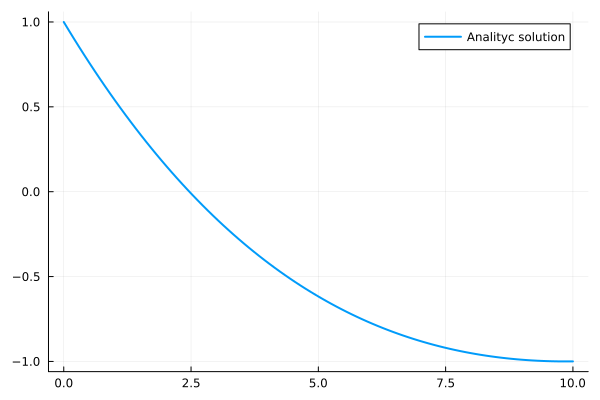

In [2]:
x = range(0, 10, 100)
y = cos.(sqrt.(x))
plot(x, y, label="Analityc solution", linewidth=2)

Разложение в ряд Тейлора в точке 0 имеет вид:

$y = y(0) + \frac{y'(0)}{1!}\cdot (x-0)+\frac{y''(0)}{2!}\cdot (x - 0)^2 + \frac{y'''(0)}{3!}\cdot (x - 0)^3$

Продифференцируем исходное уравнение:

$4y'' + 4xy''' + 2y'' + y' = 0$

В точке 0:

$6y''(0) = -y'(0)$

Откуда:

$y''(0) = \frac{-y'(0)}{6} = \frac{-1}{6} \cdot \frac{-1}{2}=\frac{1}{12}$

Для опеределения третьей производной повторно продифференцируем исходное уравнение:

$6y^{(3)} + 4y^{(3)} + 4xy^{(4)} + y'' = 0$

В точке 0:

$10y^{(3)}(0) = - y''(0)$

$y^{(3)}(0) = \frac{-y''(0)}{10} = \frac{-1}{120}$

Подставим полученные значения в ряд Тейлора:

$y = 1 - \frac{x}{2} + \frac{x^2}{24} - \frac{x^3} {720}$


In [3]:
function analityc(xs)
    ys = @. cos(sqrt(xs))
end;

In [4]:
function taylor(xs)
    ys = @. (1 - xs / 2 + xs^2 / 24 - xs^3 / 720)
end;

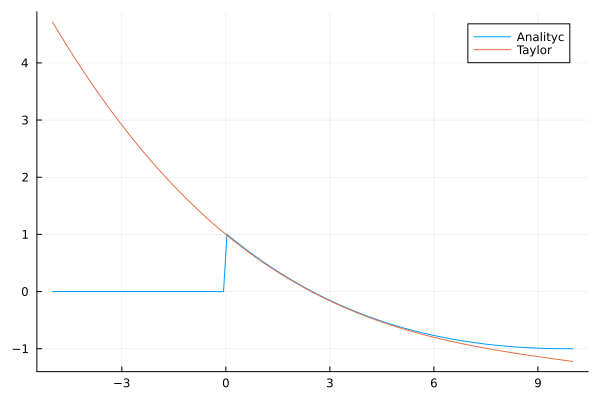

In [5]:
x = range(0, 10, 100)
neg_x = range(-5, 10, 150)

y1 = taylor(neg_x)
y = analityc(x)
y = append!(zeros(length(neg_x) - length(x)), y)
plot(neg_x, [y, y1], label=["Analityc" "Taylor"])

Метод Эйлера:

$ u_{n+1} = u_n + h_n\cdot f(x_n, u_n)$

где:

$h_n = x_{n+1}-x_n$

In [6]:
function euler(x0, y0, abs_x_max, y_derivative_0, step, func, eps)
    no_disperancy = true
    y = y0
    xs = [x0]
    ys = [y0]
    p = y_derivative_0
    half_p = y_derivative_0
    half_y = y0
    # println(x0, " ", y)
    while true
        half_p = func(x0, y, half_p, step/2.)
        half_y += half_p*step/2.
        half_p = func(x0+step/2., half_y, half_p, step/2.)
        half_y += half_p*step/2.
        p = func(x0, y, p, step)
        y += step * p
        x0 += step
        # println(x0," ", y)
        if y == Inf || abs(x0) > abs_x_max
            break
        end
        println(y, " ", half_y)
        if abs(y - half_y)/half_y >= eps
            no_disperancy = false
        end

        push!(xs, x0)
        push!(ys, y)
    end
    xs, ys, x0, no_disperancy
end;

Для решения методом Эйлера введем замену:

$p(x) = y'(x)$

Тогда уравнение представимо в виде:

$4xp'(x) + 2p(x)+y = 0$

И явлется ОДУ первой степени, которое необходимо решить методом Эйлера для вычисления $p(x)$, которая в свою очередь является $y'(x)$ необходимой для решения исходного уравнения.

In [7]:
function p_derivative(prev_x, prev_y, prev_p)
    if(prev_x ==0.0)
        prev_x = 1e-7
    end
    derivative_p = (-2prev_p-prev_y)/(4prev_x)
end;

In [8]:
function y_derivative(prev_x, prev_y, prev_p, x_step)
    new_p = prev_p + x_step *p_derivative(prev_x, prev_y, prev_p)
end;

In [9]:
best_step = 0.1
euler_xs = []
euler_yss = []
for i in [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]
    global best_step = i
    global euler_xs, euler_ys, x0, no_disperancy =  euler(0.0, 1., 10., -0.5, best_step, y_derivative, 0.1)
    push!(euler_yss, euler_ys)
    if no_disperancy
        break
    end
end
best_step

0.95 0.9503125
0.90125 0.9016240234375
0.853421875 0.853787575378418
0.8064532552083333 0.8067762408573969
0.7603153800455729 0.7605746538922908
0.7149897154988606 0.71517099992097
0.6704620658497957 0.6705550160806887
0.6267204552262006 0.626717264052729
0.5837541938439982 0.5836488053218578
0.5415534075556848 0.5413410354052179
0.5001087770628979 0.4997855907832657
0.45941138255373115 0.45897429276121193
0.41945260576879273 0.4188991116425281
0.3802240653875658 0.37955214279508454
0.34171757276033343 0.3409255900416428
0.30392510059940825 0.30301175375390804
0.2668387602238254 0.26580302207536727
0.23045078462366586 0.22929186428892537
0.1947535155893112 0.19347082569355403
0.15973939374587467 0.15833252356704597
0.12540095070634172 0.12386964392632377
0.09173080279786153 0.09007493888395277
0.058721645975031045 0.056941224457519354
0.026366251641854452 0.024461378727990587
-0.005342536821507891 -0.007371659729458819
-0.03641180697878148 -0.03856489319933726
-0.0668485798186279 -0.06

0.1

In [10]:
data = []
push!(data, euler_xs)
push!(data, [])
for i in 1:length(euler_xs)
    if i > 1 && i < length(euler_xs) && (i - 1) % 2 == 0
        push!(data[2], euler_yss[1][div(i, 2)+1])
    elseif i==1
        push!(data[2], euler_yss[1][i])
    elseif i == length(euler_xs)
        push!(data[2], euler_yss[1][length(euler_xs[1])])
    else
        push!(data[2], nothing)    
    end
end
push!(data, euler_yss[2])
push!(data, analityc_)
# table = hcat(data[1], data[2], data[3], data[4])
# header = ["x", "h = 0.1", "h = 0.05", "y(x)"]
# pretty_table(stdout, table, header=header)

BoundsError: BoundsError: attempt to access 1-element Vector{Any} at index [2]

| **x** | **h = 0.1** | **h = 0.05** | **y(x)**   |
|------:|------------:|-------------:|-----------:|
| 0.0   | 1.0         | 1.0          | 1.0        |
| 0.05  | nothing     | 0.975        | 0.975104   |
| 0.1   | 0.95        | 0.950156     | 0.950415   |
| 0.15  | nothing     | 0.925494     | 0.925933   |
| 0.2   | 0.900625    | 0.901023     | 0.901656   |
| 0.25  | nothing     | 0.876746     | 0.877583   |
| 0.3   | 0.851974    | 0.852665     | 0.853713   |
| 0.35  | nothing     | 0.828782     | 0.830045   |
| 0.4   | 0.804079    | 0.805097     | 0.806578   |
| 0.45  | nothing     | 0.781609     | 0.783312   |
| 0.5   | 0.756954    | 0.758319     | 0.760245   |
| 0.55  | nothing     | 0.735226     | 0.737375   |
| 0.6   | 0.710602    | 0.712329     | 0.714703   |
| 0.65  | nothing     | 0.689628     | 0.692227   |
| 0.7   | 0.665022    | 0.667121     | 0.669946   |
| 0.75  | nothing     | 0.64481      | 0.647859   |
| 0.8   | 0.620214    | 0.622691     | 0.625966   |
| 0.85  | nothing     | 0.600765     | 0.604264   |
| 0.9   | 0.576171    | 0.579031     | 0.582754   |
| 0.95  | nothing     | 0.557488     | 0.561433   |
| 1.0   | 0.532891    | 0.536136     | 0.540302   |
| 1.05  | nothing     | 0.514972     | 0.519359   |
| 1.1   | 0.490367    | 0.493997     | 0.498604   |
| 1.15  | nothing     | 0.473209     | 0.478035   |
| 1.2   | 0.448592    | 0.452608     | 0.457651   |
| 1.25  | nothing     | 0.432193     | 0.437451   |
| 1.3   | 0.407562    | 0.411963     | 0.417435   |
| 1.35  | nothing     | 0.391916     | 0.397601   |
| 1.4   | 0.36727     | 0.372053     | 0.377949   |
| 1.45  | nothing     | 0.352371     | 0.358478   |
| 1.5   | 0.327708    | 0.332871     | 0.339186   |
| 1.55  | nothing     | 0.313551     | 0.320073   |
| 1.6   | 0.288871    | 0.29441      | 0.301137   |
| 1.65  | nothing     | 0.275448     | 0.282379   |
| 1.7   | 0.250751    | 0.256664     | 0.263796   |
| 1.75  | nothing     | 0.238056     | 0.245389   |
| 1.8   | 0.213342    | 0.219624     | 0.227155   |
| 1.85  | nothing     | 0.201367     | 0.209095   |
| 1.9   | 0.176637    | 0.183284     | 0.191207   |
| 1.95  | nothing     | 0.165374     | 0.17349    |
| 2.0   | 0.140628    | 0.147636     | 0.155944   |
| 2.05  | nothing     | 0.130069     | 0.138567   |
| 2.1   | 0.105309    | 0.112673     | 0.121359   |
| 2.15  | nothing     | 0.0954467    | 0.104318   |
| 2.2   | 0.0706735   | 0.0783888    | 0.0874448  |
| 2.25  | nothing     | 0.0614986    | 0.0707372  |
| 2.3   | 0.036714    | 0.0447753    | 0.0541947  |
| 2.35  | nothing     | 0.028218     | 0.0378163  |
| 2.4   | 0.00342371  | 0.0118258    | 0.0216013  |
| 2.45  | nothing     | -0.00440219  | 0.00554871 |
| 2.5   | -0.0292042  | -0.0204668   | -0.0103423 |
| 2.55  | nothing     | -0.0363688   | -0.0260727 |
| 2.6   | -0.0611766  | -0.0521092   | -0.0416432 |
| 2.65  | nothing     | -0.0676888   | -0.0570547 |
| 2.7   | -0.0925002  | -0.0831085   | -0.0723082 |
| 2.75  | nothing     | -0.0983692   | -0.0874044 |
| 2.8   | -0.123182   | -0.113472    | -0.102344  |
| 2.85  | nothing     | -0.128417    | -0.117128  |
| 2.9   | -0.153228   | -0.143205    | -0.131758  |
| 2.95  | nothing     | -0.157838    | -0.146234  |
| 3.0   | -0.182646   | -0.172316    | -0.160557  |
| 3.05  | nothing     | -0.18664     | -0.174727  |
| 3.1   | -0.211443   | -0.200811    | -0.188746  |
| 3.15  | nothing     | -0.21483     | -0.202615  |
| 3.2   | -0.239624   | -0.228697    | -0.216334  |
| 3.25  | nothing     | -0.242413    | -0.229904  |
| 3.3   | -0.267196   | -0.25598     | -0.243326  |
| 3.35  | nothing     | -0.269398    | -0.256601  |
| 3.4   | -0.294167   | -0.282667    | -0.26973   |
| 3.45  | nothing     | -0.295789    | -0.282713  |
| 3.5   | -0.320542   | -0.308765    | -0.295551  |
| 3.55  | nothing     | -0.321595    | -0.308245  |
| 3.6   | -0.346329   | -0.33428     | -0.320796  |
| 3.65  | nothing     | -0.34682     | -0.333205  |
| 3.7   | -0.371533   | -0.359218    | -0.345472  |
| 3.75  | nothing     | -0.371473    | -0.357599  |
| 3.8   | -0.39616    | -0.383586    | -0.369585  |
| 3.85  | nothing     | -0.395558    | -0.381432  |
| 3.9   | -0.420219   | -0.40739     | -0.393141  |
| 3.95  | nothing     | -0.419083    | -0.404712  |
| 4.0   | -0.443713   | -0.430637    | -0.416147  |
| 4.05  | nothing     | -0.442054    | -0.427445  |
| 4.1   | -0.466651   | -0.453333    | -0.438608  |
| 4.15  | nothing     | -0.464477    | -0.449637  |
| 4.2   | -0.489038   | -0.475484    | -0.460531  |
| 4.25  | nothing     | -0.486358    | -0.471293  |
| 4.3   | -0.51088    | -0.497097    | -0.481923  |
| 4.35  | nothing     | -0.507703    | -0.492421  |
| 4.4   | -0.532184   | -0.518176    | -0.502788  |
| 4.45  | nothing     | -0.528519    | -0.513026  |
| 4.5   | -0.552955   | -0.53873     | -0.523134  |
| 4.55  | nothing     | -0.548811    | -0.533114  |
| 4.6   | -0.5732     | -0.558763    | -0.542966  |
| 4.65  | nothing     | -0.568586    | -0.552691  |
| 4.7   | -0.592925   | -0.578281    | -0.56229   |
| 4.75  | nothing     | -0.587849    | -0.571763  |
| 4.8   | -0.612135   | -0.597291    | -0.581112  |
| 4.85  | nothing     | -0.606607    | -0.590336  |
| 4.9   | -0.630838   | -0.615798    | -0.599437  |
| 4.95  | nothing     | -0.624865    | -0.608416  |
| 5.0   | -0.649037   | -0.633809    | -0.617273  |
| 5.05  | nothing     | -0.64263     | -0.626009  |
| 5.1   | -0.66674    | -0.651329    | -0.634624  |
| 5.15  | nothing     | -0.659907    | -0.643119  |
| 5.2   | -0.683953   | -0.668364    | -0.651496  |
| 5.25  | nothing     | -0.676701    | -0.659754  |
| 5.3   | -0.70068    | -0.684919    | -0.667895  |
| 5.35  | nothing     | -0.693019    | -0.675919  |
| 5.4   | -0.716928   | -0.701001    | -0.683826  |
| 5.45  | nothing     | -0.708866    | -0.691618  |
| 5.5   | -0.732703   | -0.716614    | -0.699296  |
| 5.55  | nothing     | -0.724248    | -0.706859  |
| 5.6   | -0.748009   | -0.731766    | -0.714309  |
| 5.65  | nothing     | -0.73917     | -0.721646  |
| 5.7   | -0.762854   | -0.74646     | -0.728871  |
| 5.75  | nothing     | -0.753638    | -0.735984  |
| 5.8   | -0.777241   | -0.760703    | -0.742987  |
| 5.85  | nothing     | -0.767657    | -0.74988   |
| 5.9   | -0.791177   | -0.7745      | -0.756664  |
| 5.95  | nothing     | -0.781234    | -0.763339  |
| 6.0   | -0.804668   | -0.787857    | -0.769906  |
| 6.05  | nothing     | -0.794372    | -0.776365  |
| 6.1   | -0.817718   | -0.800779    | -0.782718  |
| 6.15  | nothing     | -0.807078    | -0.788965  |
| 6.2   | -0.830333   | -0.813271    | -0.795107  |
| 6.25  | nothing     | -0.819357    | -0.801144  |
| 6.3   | -0.842518   | -0.825339    | -0.807076  |
| 6.35  | nothing     | -0.831215    | -0.812906  |
| 6.4   | -0.854279   | -0.836987    | -0.818632  |
| 6.45  | nothing     | -0.842656    | -0.824257  |
| 6.5   | -0.865621   | -0.848222    | -0.82978   |
| 6.55  | nothing     | -0.853685    | -0.835202  |
| 6.6   | -0.87655    | -0.859048    | -0.840524  |
| 6.65  | nothing     | -0.864309    | -0.845747  |
| 6.7   | -0.887069   | -0.86947     | -0.85087   |
| 6.75  | nothing     | -0.874531    | -0.855895  |
| 6.8   | -0.897186   | -0.879494    | -0.860823  |
| 6.85  | nothing     | -0.884358    | -0.865653  |
| 6.9   | -0.906903   | -0.889124    | -0.870387  |
| 6.95  | nothing     | -0.893793    | -0.875026  |
| 7.0   | -0.916228   | -0.898366    | -0.879569  |
| 7.05  | nothing     | -0.902843    | -0.884017  |
| 7.1   | -0.925164   | -0.907224    | -0.888372  |
| 7.15  | nothing     | -0.911511    | -0.892633  |
| 7.2   | -0.933717   | -0.915704    | -0.896801  |
| 7.25  | nothing     | -0.919804    | -0.900877  |
| 7.3   | -0.941892   | -0.923811    | -0.904862  |
| 7.35  | nothing     | -0.927726    | -0.908755  |
| 7.4   | -0.949693   | -0.931549    | -0.912559  |
| 7.45  | nothing     | -0.935281    | -0.916272  |
| 7.5   | -0.957125   | -0.938922    | -0.919896  |
| 7.55  | nothing     | -0.942474    | -0.923432  |
| 7.6   | -0.964194   | -0.945937    | -0.92688   |
| 7.65  | nothing     | -0.949311    | -0.93024   |
| 7.7   | -0.970904   | -0.952597    | -0.933514  |
| 7.75  | nothing     | -0.955796    | -0.936701  |
| 7.8   | -0.97726    | -0.958908    | -0.939802  |
| 7.85  | nothing     | -0.961933    | -0.942819  |
| 7.9   | -0.983266   | -0.964873    | -0.945751  |
| 7.95  | nothing     | -0.967728    | -0.948599  |
| 8.0   | -0.988927   | -0.970498    | -0.951363  |
| 8.05  | nothing     | -0.973185    | -0.954045  |
| 8.1   | -0.994249   | -0.975788    | -0.956644  |
| 8.15  | nothing     | -0.978308    | -0.959162  |
| 8.2   | -0.999234   | -0.980746    | -0.961598  |
| 8.25  | nothing     | -0.983102    | -0.963954  |
| 8.3   | -1.00389    | -0.985377    | -0.96623   |
| 8.35  | nothing     | -0.987572    | -0.968427  |
| 8.4   | -1.00822    | -0.989686    | -0.970544  |
| 8.45  | nothing     | -0.991721    | -0.972583  |
| 8.5   | -1.01222    | -0.993677    | -0.974544  |
| 8.55  | nothing     | -0.995555    | -0.976428  |
| 8.6   | -1.01591    | -0.997355    | -0.978235  |
| 8.65  | nothing     | -0.999078    | -0.979966  |
| 8.7   | -1.01929    | -1.00072     | -0.981621  |
| 8.75  | nothing     | -1.00229     | -0.983201  |
| 8.8   | -1.02235    | -1.00379     | -0.984707  |
| 8.85  | nothing     | -1.00521     | -0.986138  |
| 8.9   | -1.02512    | -1.00655     | -0.987496  |
| 8.95  | nothing     | -1.00782     | -0.98878   |
| 9.0   | -1.02758    | -1.00902     | -0.989992  |
| 9.05  | nothing     | -1.01014     | -0.991133  |
| 9.1   | -1.02974    | -1.01119     | -0.992201  |
| 9.15  | nothing     | -1.01217     | -0.993199  |
| 9.2   | -1.03162    | -1.01308     | -0.994126  |
| 9.25  | nothing     | -1.01392     | -0.994983  |
| 9.3   | -1.03321    | -1.01469     | -0.995771  |
| 9.35  | nothing     | -1.01538     | -0.99649   |
| 9.4   | -1.03451    | -1.01601     | -0.99714   |
| 9.45  | nothing     | -1.01657     | -0.997722  |
| 9.5   | -1.03554    | -1.01706     | -0.998237  |
| 9.55  | nothing     | -1.01748     | -0.998685  |
| 9.6   | -1.03629    | -1.01784     | -0.999067  |
| 9.65  | nothing     | -1.01812     | -0.999382  |
| 9.7   | -1.03677    | -1.01835     | -0.999633  |
| 9.75  | nothing     | -1.0185      | -0.999818  |
| 9.8   | -1.03698    | -1.01859     | -0.999938  |
| 9.85  | nothing     | -1.01862     | -0.999995  |
| 9.9   | -1.03693    | -1.01858     | -0.999988  |
| 9.95  | nothing     | -1.01848     | -0.999918  |

0.975 0.975078125
0.9503125 0.9504064534505209
0.925857421875 0.9259498246574402
0.9016204508463541 0.9017026916113341
0.8775955372873941 0.8776623063548695
0.8537791262411117 0.8538267648910479
0.8301687096023505 0.8301945224458515
0.8067623071706393 0.8067642186087614
0.7835582387859561 0.7835345998596892
0.7605550099798859 0.7605044803402484
0.7377512488516443 0.7376727200150186
0.7151456686282641 0.7150382116166374
0.692737044176037 0.692599872395195
0.6705241965833416 0.6703566386650224
0.6485059826577217 0.6483074620648741
0.6266812875440744 0.6264513069124062
0.6050490193968346 0.6047871482825883
0.5836081054455455 0.5833139705796558
0.5623574890307883 0.5620307664543823
0.5412961273315308 0.5409365359685085
0.5204229895951725 0.5200302859396411
0.4997370557396828 0.49931102942028466
0.4792373152356021 0.4787777852781633
0.4589227662015908 0.45842957785412836
0.43879241466505803 0.4382654366802695
0.4188452739519234 0.4182843962452909
0.3990803641784875 0.3984854957973963
0.3794

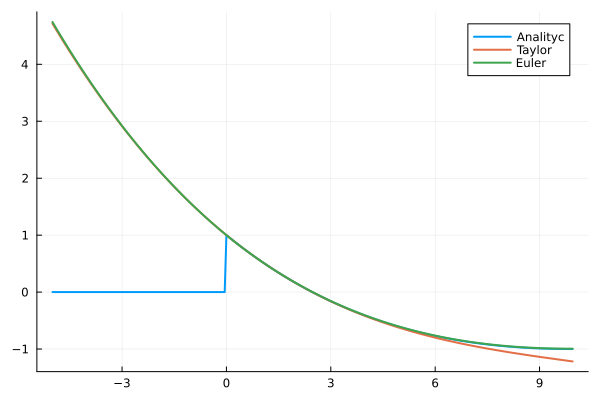

In [11]:
euler_xs, euler_ys =  euler(0., 1., 10., -0.5, 0.05, y_derivative, 1)
euler_xs_2, euler_ys_2 = euler(0., 1., 5., -0.5, -0.05, y_derivative, 1)
reverse!(euler_xs_2)
reverse!(euler_ys_2)
append!(euler_xs_2, euler_xs)
append!(euler_ys_2, euler_ys)
taylor_ys = taylor(euler_xs_2)
analityc_ys = analityc(euler_xs_2[euler_xs_2 .>= 0])
analityc_ys = append!(zeros(length(euler_xs_2)-length(analityc_ys)), analityc_ys) 
plot(euler_xs_2, [analityc_ys, taylor_ys, euler_ys_2], label=["Analityc" "Taylor" "Euler"], linewidth=2)

Метод Рунге-Кутты:

$y_{n+1} = y_n + h((1-\alpha)f(x_n, y_n)+\alpha(f(x_n+\frac{h}{2\alpha}, y_n+\frac{h}{2\alpha}f(x_n, y_n)))) $

In [12]:
function runge_kutta(x0, y0, abs_x_max, y_derivative_0, step, alpha)
    # no_disperancy = true
    xs = [x0]
    ys = [y0]
    p = y_derivative_0
    while true
        new_y = y0 + step*((1 - alpha)p + alpha*(p + step * p_derivative(x0, y0, p) / (2alpha)))
        new_p = p + step*((1 - alpha)p_derivative(x0, y0, p) +
                         alpha * p_derivative(x0 + step / (2alpha),
            y0 + step * p / (2alpha),
            p + step * p_derivative(x0, y0, p) / (2alpha)))
        p = new_p
        y0 = new_y
        x0 += step
        if y0 == Inf || abs(x0) > abs_x_max
            break
        end
        push!(xs, x0)
        push!(ys, y0)
    end
    xs, ys, x0
end;

In [13]:
runge_kutta_xs = []
runge_kutta_yss = []
for i in [1.0, 0.5]
    global runge_kutta_xs, runge_kutta_ys, x0 =  runge_kutta(0.0, 1.0, 10.0, -0.5, 0.05, i)
    push!(runge_kutta_yss, runge_kutta_ys)
end

In [14]:
data = []
push!(data, runge_kutta_xs)
push!(data, runge_kutta_yss[1])
push!(data, runge_kutta_yss[2])
push!(data, analityc(runge_kutta_xs))
table = hcat(data[1], data[2], data[3], data[4])
header = ["x", "alpha = 1.0", "alpha = 0.5", "y(x)"]
pretty_table(table; header=header)

┌──────┬─────────────┬─────────────┬────────────┐
│    x │ alpha = 1.0 │ alpha = 0.5 │       y(x) │
├──────┼─────────────┼─────────────┼────────────┤
│  0.0 │         1.0 │         1.0 │        1.0 │
│ 0.05 │       0.975 │       0.975 │   0.975104 │
│  0.1 │    0.950391 │    0.950273 │   0.950415 │
│ 0.15 │    0.925977 │    0.925762 │   0.925933 │
│  0.2 │     0.90176 │     0.90146 │   0.901656 │
│ 0.25 │     0.87774 │    0.877367 │   0.877583 │
│  0.3 │    0.853918 │    0.853479 │   0.853713 │
│ 0.35 │    0.830294 │    0.829795 │   0.830045 │
│  0.4 │    0.806867 │    0.806314 │   0.806578 │
│ 0.45 │    0.783638 │    0.783034 │   0.783312 │
│  0.5 │    0.760606 │    0.759955 │   0.760245 │
│ 0.55 │     0.73777 │    0.737075 │   0.737375 │
│  0.6 │    0.715128 │    0.714393 │   0.714703 │
│ 0.65 │    0.692682 │    0.691907 │   0.692227 │
│  0.7 │    0.670429 │    0.669618 │   0.669946 │
│ 0.75 │    0.648368 │    0.647523 │   0.647859 │
│  0.8 │      0.6265 │    0.625622 │   0.625966 │


In [15]:
alpha1_mean_err =sum(analityc(runge_kutta_xs) - runge_kutta_yss[1])/length(runge_kutta_xs)

-0.0007696079555348245

In [16]:
alpha1_max_err = maximum(analityc(runge_kutta_xs) - runge_kutta_yss[1])

0.0001039932104793806

In [17]:
alpha05_mean_err = sum(analityc(runge_kutta_xs) - runge_kutta_yss[2])/length(runge_kutta_xs)

0.00023467132423824285

In [18]:
alpha05_max_err = maximum(analityc(runge_kutta_xs) - runge_kutta_yss[2])

0.00042085594425284034

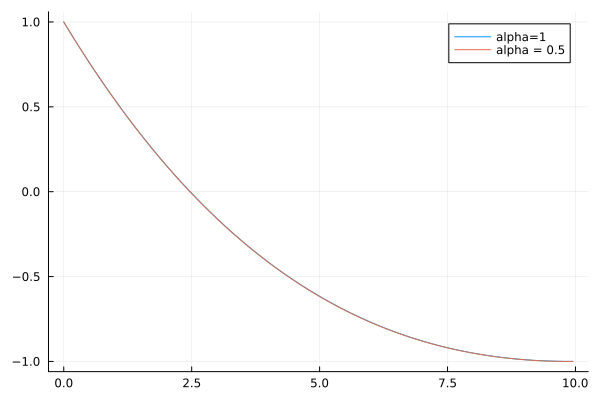

In [19]:
plot(runge_kutta_xs, [runge_kutta_yss[1], runge_kutta_yss[2]], label=["alpha=1" "alpha = 0.5" ], linewidth=1)

In [20]:
savefig("./runge_kutta.svg")

"/home/ivan/Study/modeling/lab_1/runge_kutta.svg"

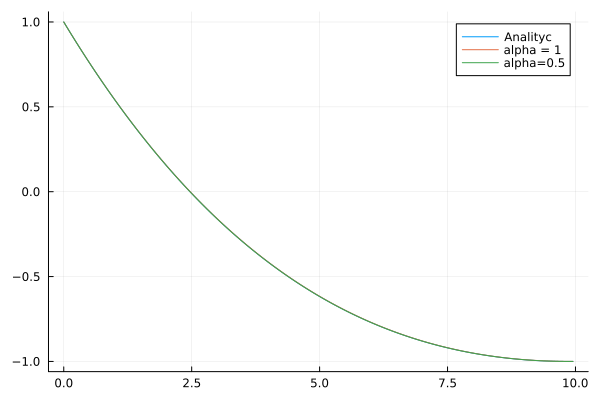

In [21]:
plot(runge_kutta_xs, [analityc(runge_kutta_xs), runge_kutta_yss[1], runge_kutta_yss[2]], label=["Analityc" "alpha = 1" "alpha=0.5"], linewidth=1)

In [22]:
savefig("./runge_kutta_analityc.svg")

"/home/ivan/Study/modeling/lab_1/runge_kutta_analityc.svg"

Решить уравнение $1 - 2xuu' = u^3u', u(0.5) = 0$

Решим уравнение относительно $x$. Для этого, по теореме о производной обратной функции выразим $x(y)' = \frac{1}{x'_y(x(y))}$. Перепишем с учетом $x(y) = y$, $y(x) = x$:

$1-2y\frac{x}{y'} = \frac{x^3}{y'}$

$y' - 2yx = x^3$

Для решения неоднородного уравнения необходимо найти решение соответствующего однородного. Решением будет $y = Ce^{x^2}$. Варьируя постоянную получим общее решение вида: $y = C(x)e^{-x^2}$. Для нахождения $C(x)$ решим уравнение:

$C'(x)e^{x^2} - x^3 = 0$

$C'(x) = \frac{x^3}{e^{x^2}}$

$C(x) = \int x^3 e^{-x^2} = |u = x^2| = \frac{1}{2}\int ue^{-u}du = \frac{1}{2}(-ue^{-u}-e^{-u}) + C_1 = \frac{1}{2}(-x^2e^{-x^2} - e^{-{x^2}}) + C_1 = -\frac{1}{2}e^{-{x^2}}(x^2+1) + C_1$

Таким образом $y = (-\frac{1}{2}e^{-x^2}(x^2 + 1) + C_1)e^{x^2} = -\frac{1}{2}(x^2+1) + C_1e^{x^2}$.

Вернем $y$ и $x$ обратно:

$x = -\frac{1}{2}(y^2+1) + C_1e^{y^2}$

Определим $C_1$ из начальных условий:

$0.5 = -\frac{1}{2} + C_1 \Rightarrow C_1 = 1$

Таким образом:

$x = -\frac{1}{2}(y^2+1) + e^{y^2}$

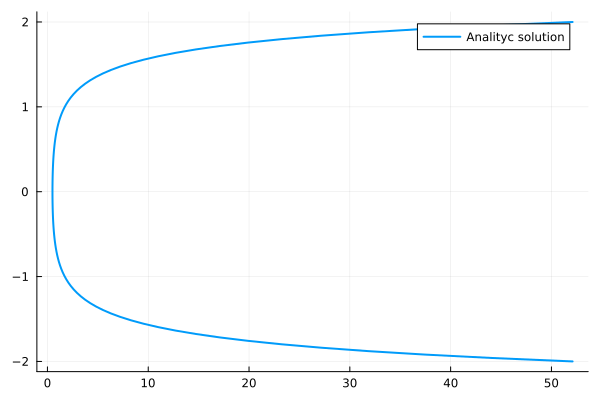

In [23]:
y = range(-2, 2, 100)
x = @. -0.5*(y^2 + 1) + exp(y^2)
plot(x, y, label="Analityc solution", linewidth=2)

In [24]:
y = range(-0, 2, 100)
x = @. -0.5*(y^2 + 1) + exp(y^2)

100-element Vector{Float64}:
  0.5
  0.5002041441030808
  0.5008175764719363
  0.5018433013699225
  0.503286339541044
  0.5051537487495082
  0.5074546526995994
  0.5102002785018112
  0.5134040029006974
  0.5170814075309862
  ⋮
 27.170816405554106
 29.410274502729962
 31.853719109956128
 34.52139113490348
 37.43569991080098
 40.62147129295796
 44.10622580563682
 47.920490667374786
 52.098150033144236

In [25]:
function integral(x_up, x_low, y)
    y = (y == 0 ? y + 1e-7 : y)
    return x_up^4 / 4 + y * x_up^2/2 - x_low^4 / 4 - y * x_low^2/2
end

integral (generic function with 1 method)

In [26]:
function picar(y, y_low, x_0, steps = 1)
    x_cur = x_0
    for i in 1:steps
        x_cur = x_0 + integral(y, y_low, x_cur)
    end
    return x_cur
end

picar (generic function with 2 methods)

In [27]:
x_0 = 0.5
y_0 = 0.0
xs=[]
for step in 1:4
    row=[]
    for y in range(-2.0, 2.0, 500)
        append!(row, picar(y, y_0, x_0, step))
    end
    push!(xs, row)
end
xs

4-element Vector{Any}:
 Any[5.5, 5.428256287099253, 5.357309617263484, 5.287153846641138, 5.217782856154253, 5.149190551498462, 5.081370863142993, 5.014317746330672, 4.948025181077914, 4.882487172174735  …  4.882487172174735, 4.948025181077914, 5.014317746330672, 5.081370863142993, 5.149190551498462, 5.217782856154253, 5.287153846641138, 5.357309617263484, 5.428256287099253, 5.5]
 Any[15.5, 15.205917077378002, 14.916807683295227, 14.632601899237567, 14.35323057519573, 14.078625323767357, 13.808718514283033, 13.54344326695615, 13.282733447056648, 13.026523659108674  …  13.026523659108674, 13.282733447056648, 13.54344326695615, 13.808718514283033, 14.078625323767357, 14.35323057519573, 14.632601899237567, 14.916807683295227, 15.205917077378002, 15.5]
 Any[35.5, 34.60479671357194, 33.73051536823969, 32.876719824350396, 32.04298179349797, 31.228880721775482, 30.43400367436859, 29.657945221479444, 28.90030732557049, 28.16069922991781  …  28.16069922991781, 28.90030732557049, 29.657945221479

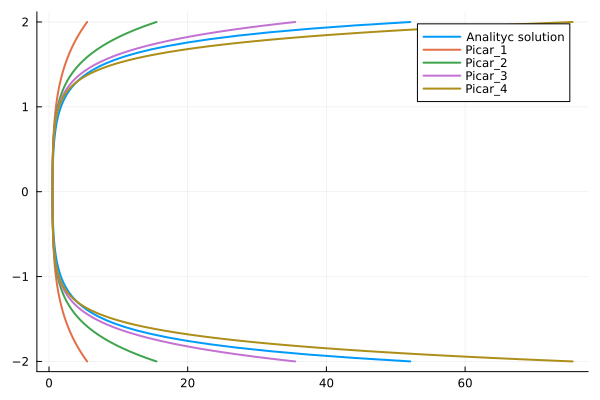

In [28]:
y = range(-2, 2, 100)
x = @. -0.5*(y^2 + 1) + exp(y^2)
plot(x, y, label="Analityc solution", linewidth=2)
plot!(xs[1], range(-2., 2., 500), label="Picar_1", linewidth=2)
plot!(xs[2], range(-2., 2., 500), label="Picar_2", linewidth=2)
plot!(xs[3], range(-2., 2., 500), label="Picar_3", linewidth=2)
plot!(xs[4], range(-2., 2., 500), label="Picar_4", linewidth=2)

In [29]:
savefig("./picar.svg")

"/home/ivan/Study/modeling/lab_1/picar.svg"

$u' = x + u^3$

In [30]:
function f(x, y)
    return x + y^3
end

f (generic function with 1 method)

In [31]:
function euler_first(x_0, y_0, step, func)
    y_cur = y_0
    x_cur = x_0
    xs = [x_cur]
    ys = [y_cur]
    half_y = y_0
    while true
        half_p = func(x_cur, y_cur)
        half_y += half_p*step/2.
        half_p = func(x_cur+step/2., half_y)
        half_y += half_p*step/2.
        y_cur += step * func(x_cur, y_cur)
        x_cur += step
        if y_cur == Inf
            break
        end
        push!(xs, x_cur)
        push!(ys, y_cur)
        
    end
    return xs, ys, x_cur
end

euler_first (generic function with 1 method)

In [32]:
x_0 = 0.0
y_0 = 0.0
xs, ys, x_stop = euler_first(x_0, y_0, 1e-7, f)
x_stop

1.6472495001280776

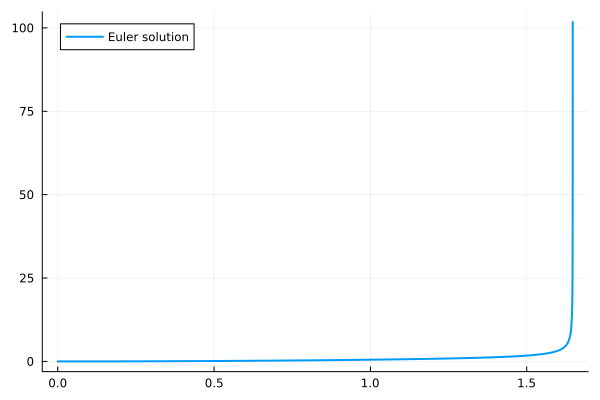

In [33]:
plot(xs[1:1000:end], ys[1:1000:end], label="Euler solution", linewidth=2)

In [34]:
function integral_new(x_up, x_low, y)
    return y^3*x_up + x_up^2/2 - y^3*x_low - x_low^2/2
    # return x_up^2/2 - x_low^2/2
end

integral_new (generic function with 1 method)

In [35]:
function picar_new(x, x_low, y_0, steps = 1)
    y_cur = y_0
    for i in 1:steps
        y_cur = y_0 + integral_new(x, x_low, y_cur)
    end
    return y_cur
end

picar_new (generic function with 2 methods)

In [36]:
x_0 = 0.0
y_0 = 0.0
picar_ys=[]
for step in 1:4
    row=[]
    for x in xs
        append!(row, picar_new(x, x_0, y_0, step))
    end
    push!(picar_ys, row)
end
picar_ys[4][end]

3.278769760618817e7

In [ ]:
plot(xs, ys, label="Euler solution", linewidth=2)
plot!(xs, picar_ys[1], label="Picar_1", linewidth=2)
plot!(xs, picar_ys[2], label="Picar_2", linewidth=2)
plot!(xs, picar_ys[3], label="Picar_3", linewidth=2)
plot!(xs, picar_ys[4], label="Picar_4", linewidth=2)